**Exploratory Analysis of Gun Data in America**


---


Cait Moran June 2019

Import libraries and set global options

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols



pd.options.display.float_format = '{:.2f}'.format

Ingest CSV data into Notebook from URL and verify success

In [2]:
url = "https://graphics8.nytimes.com/newsgraphics/2015/12/07/gun-sales/7120a9d57d2d14acc27f3f40eefc69d3ee793b80/all-data.csv"
df = pd.read_csv(url)
df.head()

,year,month,guns_total_per_1000,guns_total,guns_total_seas,handgun_share,longgun_share,missouri,maryland,new_jersey,district_of_columbia,mississippi,louisiana,alabama,texas,georgia,dc_handguns_per_100k_national_sales
0,2000,1,2.33,574951,655088.71,0.32,0.67,2.71,0.64,0.47,0.00,2.39,2.51,3.14,8.16,3.08,2.10
1,2000,2,2.34,649111,658925.86,0.32,0.68,2.73,0.64,0.47,0.00,2.39,2.49,3.12,8.27,3.04,0.50
2,2000,3,2.33,664622,657022.00,0.32,0.67,2.67,0.64,0.49,0.00,2.34,2.45,3.07,8.44,3.07,1.00
3,2000,4,2.34,552965,659698.48,0.32,0.67,2.74,0.69,0.52,0.00,2.42,2.60,3.19,8.45,3.17,1.50
4,2000,5,2.30,467712,647409.45,0.31,0.68,2.74,0.68,0.53,0.00,2.45,2.54,3.18,8.51,3.09,1.10


Get descriptive statistics of the dataset

In [3]:
df.describe()

,year,month,guns_total_per_1000,guns_total,guns_total_seas,handgun_share,longgun_share,missouri,maryland,new_jersey,district_of_columbia,mississippi,louisiana,alabama,texas,georgia,dc_handguns_per_100k_national_sales
count,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00
mean,2007.46,6.47,2.71,824178.23,825543.64,0.38,0.60,3.12,0.92,0.61,0.00,1.75,2.42,2.98,8.25,2.68,4.10
std,4.60,3.45,0.69,307373.21,240811.37,0.08,0.08,0.39,0.39,0.12,0.00,0.30,0.21,0.17,0.60,0.41,4.07
min,2000.00,1.00,1.98,409742.00,573493.95,0.29,0.39,2.42,0.64,0.42,0.00,1.27,1.85,2.56,7.01,2.11,0.00
25%,2003.50,3.50,2.22,608674.50,636369.73,0.31,0.55,2.75,0.76,0.52,0.00,1.47,2.28,2.85,7.79,2.33,0.50
50%,2007.00,6.00,2.44,760901.00,740846.43,0.37,0.61,3.23,0.84,0.59,0.00,1.75,2.39,2.93,8.35,2.57,2.10
75%,2011.00,9.00,3.26,976963.50,1018934.01,0.43,0.68,3.47,1.01,0.68,0.00,1.87,2.51,3.10,8.66,3.01,7.70
max,2015.00,12.00,6.39,2388128.00,2014801.00,0.58,0.70,3.94,5.44,1.14,0.03,2.47,3.47,3.47,10.51,4.14,15.60


A few quick inferences from the descriptive statistics:

- It looks like we do not have any missing values since the count is 191 for all variables. There are 191 data points in the dataset.
- I'm unsure what the values in the state name and guns_total_seas columns refer to. I could not find any references of what these values represent.
- This data includes every month between the years 2000 and 2015
- Between 2000 and 2015, the highest number of gun sales in a single month was 2,388,128

Hmmm.....I'd like to know a little bit more about that data point that had the highest gun sales. Let's take a look.

In [4]:
df[(df['guns_total'] == 2388128)]

,year,month,guns_total_per_1000,guns_total,guns_total_seas,handgun_share,longgun_share,missouri,maryland,new_jersey,district_of_columbia,mississippi,louisiana,alabama,texas,georgia,dc_handguns_per_100k_national_sales
155,2012,12,5.21,2388128,1642514.35,0.47,0.50,3.55,0.93,0.57,0.00,1.27,2.16,2.90,8.71,2.21,7.00


Interesting. Looks like December 2012 had the highest number of gun sales between 2000 and 2015.

What was happening in December 2012 that may have caused this? When pursuing further analysis, this may be something to focus on from a political and societal context.

Now, let's narrow down the data set to look at the total gun sales per year

We drop all the features that are not year or guns_total and check if it's successful.

In [5]:
df_year_gunsTotal = df.drop(df.columns.difference(['year','guns_total']), 1, inplace=False)
df_year_gunsTotal.head()

,year,guns_total
0,2000,574951
1,2000,649111
2,2000,664622
3,2000,552965
4,2000,467712


Wait, this still shows us all the totals broken down by month for each year. Let's aggregate the subset of the data by adding up all the gun sales for each month in a year and get the total number of guns sales per year.

In [6]:
guns_per_year = df_year_gunsTotal.groupby(['year']).sum()
guns_per_year

,guns_total
year,
2000,7860597
2001,8015913
2002,7066005
2003,7056022
2004,7351009
2005,7728322
2006,8214243
2007,8575760
2008,9437242


Now, let's visualize this. Reset the index after aggregation and visualize a simple bar plot to visualize the total gun sales between 2000 - 2015

Text(0, 0.5, 'Total Number of Gun Sales')

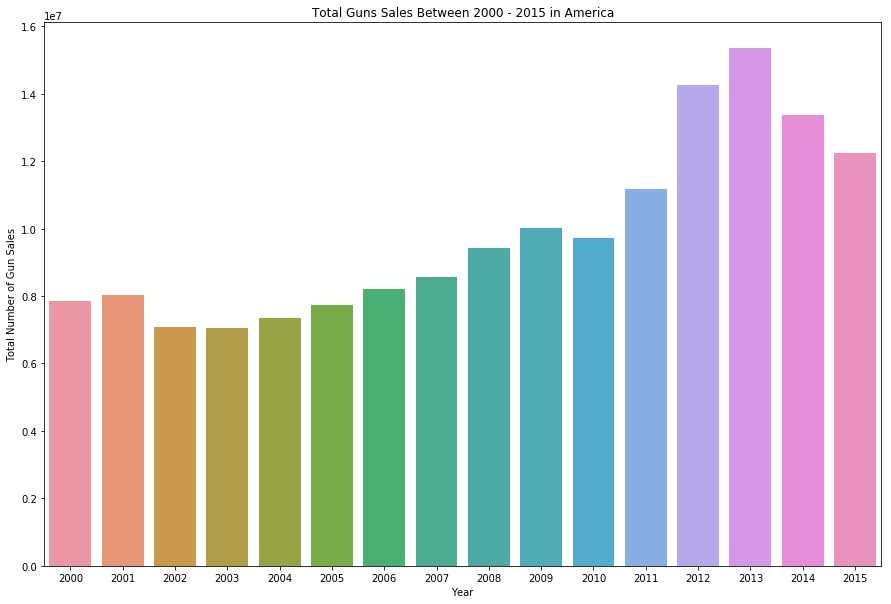

In [7]:
guns_per_year.reset_index(inplace=True)
plt.figure(figsize=(15,10))
plt.title("Total Guns Sales Between 2000 - 2015 in America")
sns.barplot(x='year', y='guns_total', data=guns_per_year, ci=None);
plt.xlabel("Year")
plt.ylabel("Total Number of Gun Sales")

Interesting. 2013 has the highest number of gun sales between 2000 and 2015, but we know the highest number of gun sales during this
time period was in December 2012. This means that although 2013 had the highest gun sales overall, December 2012 sales were higher 
than any month in 2013.

So is December usually a month that has high gun sales?

Let's check. We grab a subset to see gun sales by month.

In [8]:
df_guns_by_month = df.drop(df.columns.difference(['month','guns_total']), 1, inplace=False)
df_guns_by_month.head()

,month,guns_total
0,1,574951
1,2,649111
2,3,664622
3,4,552965
4,5,467712


Visualize total gun sales by month.

Text(0, 0.5, 'Number of Gun Sales by Month')

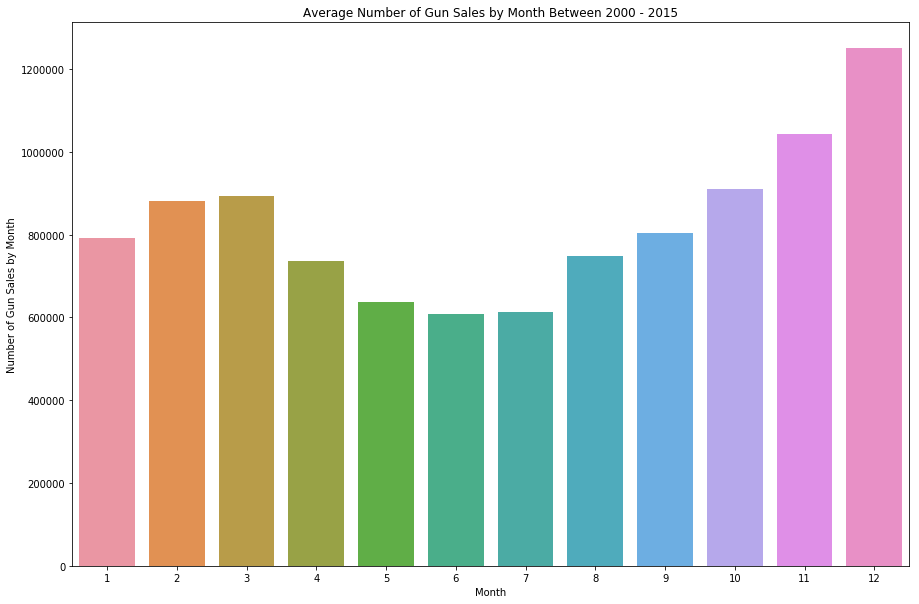

In [9]:
plt.figure(figsize=(15,10))
plt.title("Average Number of Gun Sales by Month Between 2000 - 2015")
sns.barplot(x='month', y='guns_total', data=df_guns_by_month, ci=None);
plt.xlabel("Month")
plt.ylabel("Number of Gun Sales by Month")

Looks like December usually has the highest number gun sales regardless. Without digging into any further research, an acceptable inference of "why" may be for the Christmas holiday and perhaps occurs this shows a reaction to political elections in November - these are just assumptions, we would need more research and analysis to make educated causal inferences.

It may be acceptable to assume the Christmas holiday and and political elections influence sales, how about the season? If we do a quick check related to seasons, maybe this would indicate if weather has any influences on sales.

Let's prepare our data for the season analysis.

In [10]:
df_guns_by_month['month'] = df_guns_by_month['month'].map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'})
df_guns_by_season = df_guns_by_month
df_guns_by_season.rename(columns={'month': 'season'}, inplace=True)
df_guns_by_season.head()

,season,guns_total
0,Winter,574951
1,Winter,649111
2,Spring,664622
3,Spring,552965
4,Spring,467712


Let's plot the distribution of the totals by season.

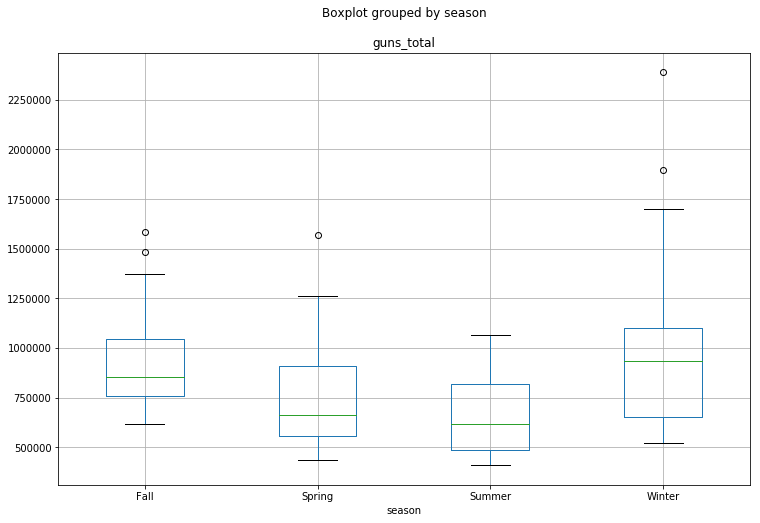

In [11]:
df_guns_by_season.boxplot('guns_total', by='season', figsize=(12, 8))

These averages look pretty close on the graph, but are the differences of these averages statistically significant?

Let's run an ANOVA on the data to see.

In [12]:
mod = ols('guns_total ~ season', data=df_guns_by_season).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                    sum_sq     df     F  PR(>F)
season    2976954948177.50   3.00 12.39    0.00
Residual 14973919865332.38 187.00   nan     nan


Looks like the P value is less than 0.05, so we will go ahead and reject the null hypothesis and conclude that the differences of the average gun sales between seasons are statistically significant.

What are the actual numbers of the average by season though?

In [13]:
avg_guns_per_season = df_guns_by_season.groupby(['season']).mean()
avg_guns_per_season.rename(columns={'guns_total': 'avg_guns_total'}, inplace=True)
avg_guns_per_season

,avg_guns_total
season,
Fall,918472.27
Spring,755953.25
Summer,656695.33
Winter,968600.87


In the Fall, an average of 918, 472 guns are sold in a year.
In the Spring, an average of 755,953 guns are sold in a year.
In the Summer an average of 656,695 guns are sold in a year.
In the Winter an average of 968,600 guns are sold in a year.

For further analysis it may be interesting to match these up with hunting seasons and find more specific information on what influences the differention in these numbers.

However, for this brief exploratory analysis, Winter seems to be the most popular season to purchase guns.



Let's see if we can quickly visualize this trend over this time span.

We saw some spikes earlier in our analysis in December and now we also know Winter is a popular time to purchase guns, 
let's take a look at the overall pattern and see if we notice any anomolies or trends.

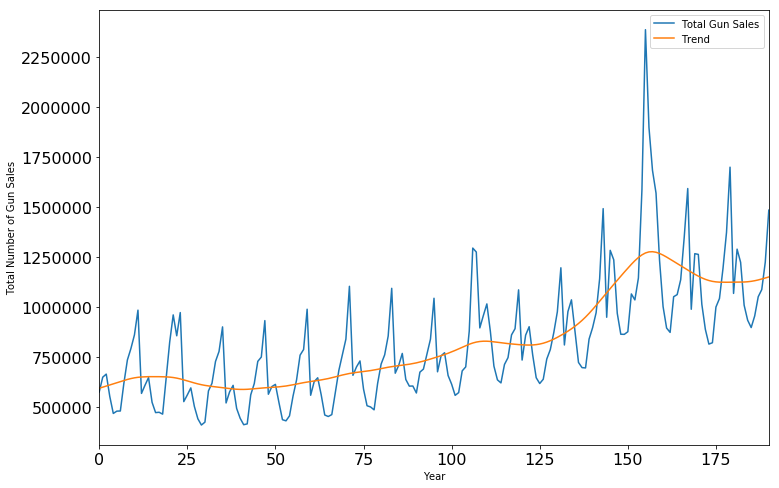

In [14]:
guns_cycle, guns_trend = sm.tsa.filters.hpfilter(df_year_gunsTotal.guns_total)
guns_decomp = df_year_gunsTotal[['guns_total']].copy()
guns_decomp["cycle"] = guns_cycle
guns_decomp["trend"] = guns_trend

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
guns_decomp[["guns_total", "trend"]].plot(ax=ax, fontsize=16);
legend = ax.get_legend()
legend.prop.set_size(20);
plt.xlabel("Year")
plt.ylabel("Total Number of Gun Sales")
plt.gca().legend(('Total Gun Sales','Trend'))

It looks like the overall trend is pretty consistent with a general slow and steady increase happening. This severe uptick that happened suggests a clear driver or event caused a change that was unexpected overall. From previous analysis we can assume this started in that December 2012 into 2013 timeframe. We definitely want to get to the bottom of what happened during this timeframe that served as the catalyst.

I'd also like to know more about the types of guns that contribute to these sales. I see Hand Gun and Long Gun catagories available in the data with values that are assumed to be percentage of market sales.

Let's grab a subset of our dataset that breaks down Hand Gun share vs Long Gun share by year.

In [15]:
df_year_by_gunType = df.drop(df.columns.difference(['year','handgun_share','longgun_share']), 1, inplace=False)
df_year_by_gunType.loc[:,'handgun_share'] *= 100
df_year_by_gunType.loc[:,'longgun_share'] *= 100
df_year_by_gunType.head()

,year,handgun_share,longgun_share
0,2000,31.83,67.49
1,2000,31.78,67.55
2,2000,32.02,67.28
3,2000,31.88,67.41
4,2000,31.48,67.75


Let's quickly visually what these percentages look like over time.

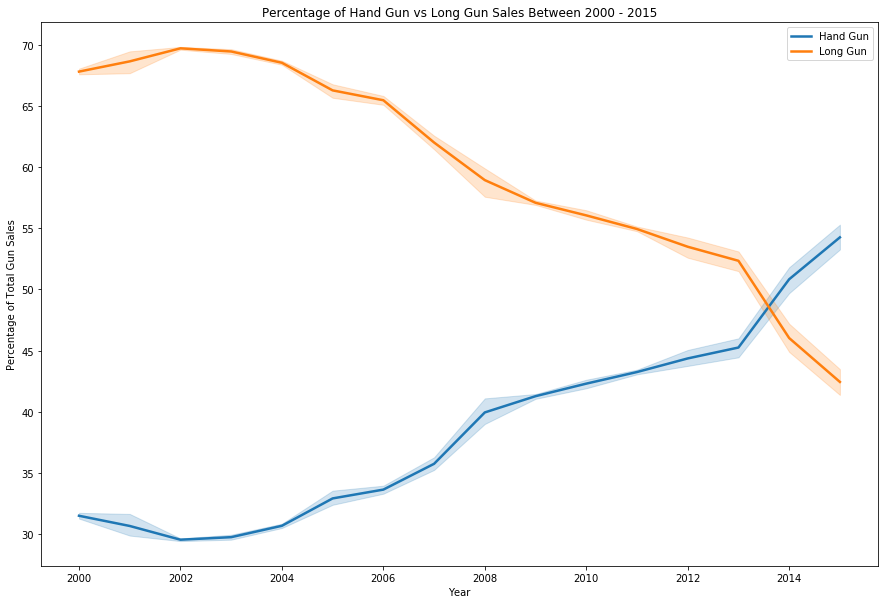

In [16]:
plt.figure(figsize=(15,10))
plt.title("Percentage of Hand Gun vs Long Gun Sales Between 2000 - 2015")
sns.lineplot(data=df_year_by_gunType, x='year', y='handgun_share', palette="tab10", linewidth=2.5, legend="brief")
sns.lineplot(data=df_year_by_gunType, x='year', y='longgun_share', palette="tab10", linewidth=2.5, legend="brief")
plt.xlabel("Year")
plt.ylabel("Percentage of Total Gun Sales")
plt.gca().legend(('Hand Gun','Long Gun'))

Interesting. It looks like back in 2000, most of the guns sold in America were Long Guns and a small percentage Hand Guns. 
With a steady decrease in long gun sales and a steady increase in hand gun sales, it looks like right before 2014, 
there was a crossover where Hand Gun sales started to take over the market share from Long Guns.

If we pair this with the previous information we learned, we can start to paint a story that not only did gun sales spike during 2013 timeframe, it was also the point that Hand Guns started to become a more popular purchase than Long Guns. With this information we can start to make some inferences, such as concluding that there may have been a significant shift in mindset of intended use or motive of gun ownership in America during this time period.